## AI.1 Aprendizaje estadístico-automático
Ana Paola Loredo Moreno - 613772

## Introducción
Los hábitos y estilo de vida de una persona impactan directamente a la salúd. Se recopiló información de individuos de Perú, México y Colombia en el que se guardaron los datos demográficos, hábitos y nivel de peso de 2110 personas, midiendo sus niveles de sobrepeso/obesidad. A continuación se explorarán las variables consideradas para el estudio y que posibles asociaciones se pueden analizar.  

# Exploración inicial de los datos
La base de datos contiene información individual sobre hábitos, características físicas y nivel de obesidad de personas. Se encuentran las siguientes variables de información por persona: sexo, edad, estatura,  peso, familiares con sobrepeso(si/no), consumo excesivo de calorias (si/no), consumo de vegetales (si/no), hábito de fumar(si/no), su consumo de agua y su nivel de obesidad. 

Las variables se dividen en dos tipos de información, variables cuantitativas y variables categóricas. Las variables cuantitativas son características medibles numéricamente. Al tener datos numéricos podemos hacer cálculos numéricos y encontrar tendencias generales, por ejemplo, el promedio de peso de las personas en el estudio. Las variables categóricas tienen respuestas predeterminadas, describen hábitos y condiciones específicas de las personas, lo que facilita analizar comportamientos comunes y encontrar correlaciones.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("A1.1 Obesidad.csv")
print("---------------------------------------------------------------")
print("-----------------Conjunto de datos simplificada----------------")
print(df)

---------------------------------------------------------------
------------------Base de datos simplificada-------------------
        Sexo       Edad  Estatura        Peso FamiliarConSobrepeso  \
0     Female  21.000000  1.620000   64.000000                  yes   
1     Female  21.000000  1.520000   56.000000                  yes   
2       Male  23.000000  1.800000   77.000000                  yes   
3       Male  27.000000  1.800000   87.000000                   no   
4       Male  22.000000  1.780000   89.800000                   no   
...      ...        ...       ...         ...                  ...   
2106  Female  20.976842  1.710730  131.408528                  yes   
2107  Female  21.982942  1.748584  133.742943                  yes   
2108  Female  22.524036  1.752206  133.689352                  yes   
2109  Female  24.361936  1.739450  133.346641                  yes   
2110  Female  23.664709  1.738836  133.472641                  yes   

     ComeMuchasCalorias  ComeVe

## Variables númericas
- Edad
- Estatura
- Peso
- ComeVegetales 
- ConsumoDeAgua

In [34]:
df.describe()

,Edad,Estatura,Peso,ComeVegetales,ConsumoDeAgua
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.008011
std,6.345968,0.093305,26.191172,0.533927,0.612953
min,14.000000,1.450000,39.000000,1.000000,1.000000
25%,19.947192,1.630000,65.473343,2.000000,1.584812
50%,22.777890,1.700499,83.000000,2.385502,2.000000
75%,26.000000,1.768464,107.430682,3.000000,2.477420
max,61.000000,1.980000,173.000000,3.000000,3.000000


## Variables categóricas
- Sexo (hombre/mujer)
- Familiar con sobrepeso (si tiene/no tiene)
- Consumo excesivo de calorias (si consume/no consume)
- Fumador (si fuma/no fuma)
- Nivel de peso (7 categorias)

In [36]:
df.describe(include='object')


,Sexo,FamiliarConSobrepeso,ComeMuchasCalorias,Fumador,NivelDeObesidad
count,2111,2111,2111,2111,2111
unique,2,2,2,2,7
top,Male,yes,yes,no,Obesity_Type_I
freq,1068,1726,1866,2067,351


## Reflexión sobre el diseño del estudio

Dado a que se están considerando las características sobre estilo de vida y condición física de personas, agregaría una variable categórica(baja, moderada, alta) que defina la actividad física de la persona. Según Martí (2018), el sedentarismo tiene un impacto directo en la salúd de una persona, especialmente en su peso. Que una persona tenga una vida sedentaria no significa que sea candidato directo a tener sobrepeso pero la combinación de baja actividad física y más características contempladas en el estudio tienen una correlación. Esta variable ayudaría a comprender mejor el contexto del estilo de vida de las personas, pues la actividad física impacta directamente en la salúd de las personas. 

## Definición de una variable de interés para inferencia

Variable de interés: NiveldeObesidad

El nivel de peso corporal es la variable en la que se centra el estudio, conocida como la variable de interés. Está variable representa el resultado principal del estudio a analizar pues permite identificar como las demás variables demográficas y hábitos se asocian con diferentes niveles de obesidad. A partir de está variable se desea analizar tendencias o como influyen demás características como el sexo, edad, etc. en el resultado de sobrepeso. Siendo una variable categorica, su naturaleza permite agrupar a individuos en las categorías mostradas en el histograma, en respectivo nivel de obesidad.  

Sus categorías son las siguientes:
- Peso corporal insuficiente
- Peso corporal normal
- Sobrepeso nivel I
- Sobrepeso nivel II
- Obesidad I
- Obesidad II
- Obesidad III

In [37]:
df["NivelDeObesidad"].describe()

count               2111
unique                 7
top       Obesity_Type_I
freq                 351
Name: NivelDeObesidad, dtype: object

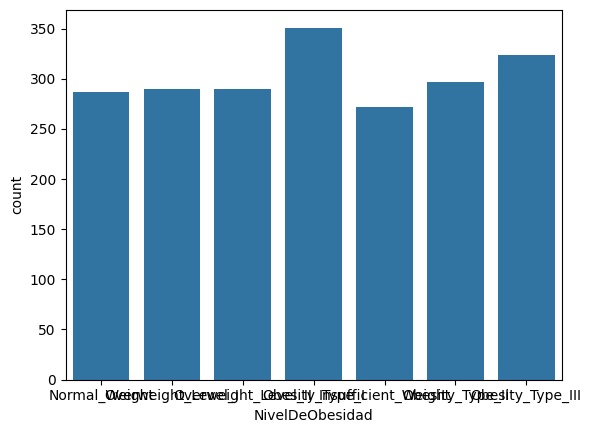

In [12]:
sns.countplot(data=df, x="NivelDeObesidad")
plt.show()

## Análisis gráfico enfocado en una subpoblación

Teniendo 7 categorías de obesidad, se utilizó un diagrama de caja para visualizar la distribución de peso en las mujeres que se encuentra en cada nivel de obesidad. Cada caja representa el comportamiento de peso mediante el valor mínimo, máximo, promedio y sus cuartiles, lo que permite observar el nivel central y la dispersión de los datos en cada categoría de sobrepeso definida. Podemos ver que el diagrama de cajas incrementa progresivamente en cada nivel de sobrepeso/obesidad en las mujeres de acuerdo al peso más alto. Se observa una mayor varianza de peso en la categoría de obesidad tipo III, siendo que el peso más alto encontrado es de 160+ kg en la categoria más alta de obesidad. 


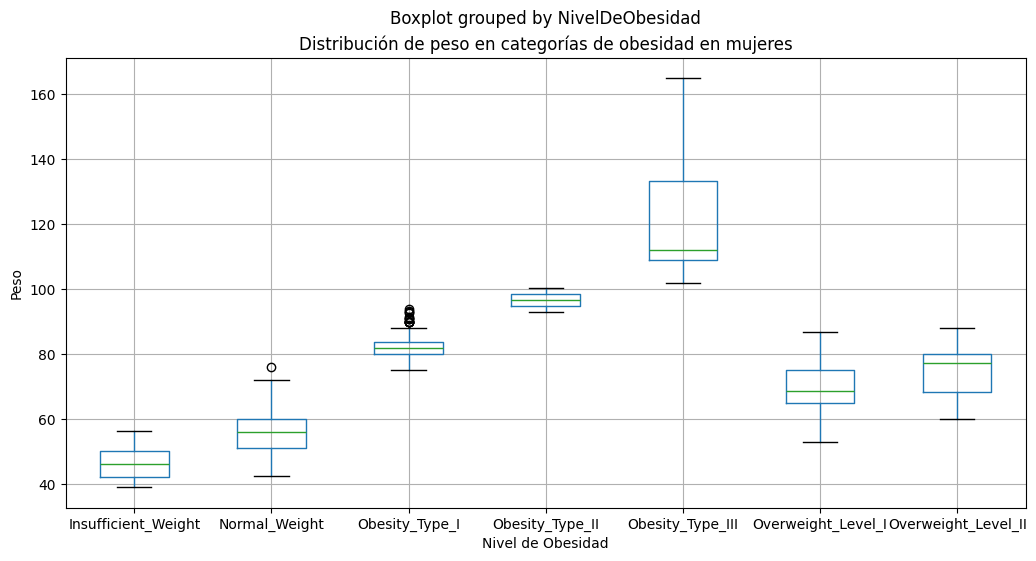

In [ ]:
df_mujeres = df[df["Sexo"]=="Female"]

fig, ax = plt.subplots(figsize=(12, 6))

df_mujeres.boxplot(column="Peso",by="NivelDeObesidad",ax=ax)

ax.set_xlabel("Nivel de Obesidad")
ax.set_ylabel("Peso")
ax.set_title("Distribución de peso en categorías de obesidad en mujeres")
plt.show()


# Conclusión
Utilizando el conjunto de datos proporcionado por la Universidad de la Costa en Colombia, se realizó una exploración inicial con el objetivo de comprender qué variables fueron consideradas en el estudio y qué tipo de información aportan. Se definió la variable NivelDeObesidad como la variable de interés, ya que es una variable categórica que resume el estado de peso de cada persona y permite analizar su relación con las demás características demográficas y de estilo de vida incluidas en el conjunto de datos.

Para explorar la relación entre el nivel de obesidad y el peso corporal, se utilizó un diagrama de caja, el cual permite visualizar la distribución de una variable numérica a través de distintas categorías. A partir de esta visualización, se observa una tendencia de incremento progresivo en el peso conforme aumenta el nivel de obesidad, lo que indica una asociación entre ambas variables.



## Referencias
Inferential statistics. (s/f). Cuemath.com. Recuperado el 19 de enero de 2026, de https://www.cuemath.com/data/inferential-statistics/

Martí, A. A., Meneses, L. F., & Alejos, S. C. (2018, agosto 17). Causas de la Obesidad. Clínic Barcelona. https://www.clinicbarcelona.org/asistencia/enfermedades/obesidad/causas-y-factores-de-riesgo

Montes, D. (2018, octubre 23). Diagrama BoxPlot - Proyectos Gestión Conocimiento. Proyectos Gestión Conocimiento. https://www.pgconocimiento.com/diagrama-boxplot/ 

RPubs - Clase 2. (s/f). Rpubs.com. Recuperado el 19 de enero de 2026, de https://rpubs.com/WinterMeza/1181547

Westreicher, G. (2021, enero 7). Variable cuantitativa: Qué es, tipos y ejemplos. Economipedia. https://economipedia.com/definiciones/variable-cuantitativa.html

## Código de honor
Yo, Ana Paola Loredo Moreno, doy mi palabra de que he realizado esta actividad con integridad académica. 